# T20i Batsmen Analysis (Top 10 Teams)

## Importing Data

In [3]:
import pandas as pd

dfx = pd.read_csv('/Users/muhammadibrahimkhalid/Downloads/t20.csv')
dfx.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15
0,0,V Kohli (INDIA),2010-2019,75,70,20,2633,94*,52.66,1907,138.07,0,24,2,247,71,NaN
1,1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120,NaN
2,2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113,NaN
3,3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61,NaN
4,4,BB McCullum (NZ),2005-2015,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91,NaN


## Cleaning Data

In [4]:
# Data Spliting and Droping Unecessary Column)
dfx.drop(columns={'Unnamed: 0','Unnamed: 15'}, inplace=True)
dfx[['Players', 'Country','Test']] = dfx['Player'].str.split('(', expand=True)
dfx[['Debut','Last_Match']]= dfx['Span'].str.split('-', expand = True)
dfx.drop(columns={'Test'}, inplace=True)
dfx.drop(columns=['Span'], inplace=True)
dfx[['Country','Test']] = dfx['Country'].str.split(')', expand=True)
dfx.drop(columns={'Test'}, inplace=True)
dfx.drop(columns={'Player'}, inplace=True)
dfx=dfx.drop(columns=['Ave','SR'])

# Reorder and sort DF
dfx = dfx [['Players','Country','Debut','Last_Match','Mat','Inns','NO','Runs','HS','BF','100','50','0','4s','6s']]
dfx = dfx.sort_values(by=['Mat', 'Inns'], ascending=False)

# Removing redundency in Country
dfx.replace({'AFG/GER': 'AFG', 'AFG/ICC': 'AFG', 'AUS/ICC/NZ': 'AUS','AUS/NL': 'AUS', 
            'AUS/World':'AUS','BDESH/ICC/World':'BDESH', 'ENG/ICC': 'ENG', 'ENG/IRE': 'ENG',
              'ENG/World': 'ENG','ICC/INDIA': 'INDIA', 'ICC/NZ':'NZ','ICC/SL/World':'SL',
              'NZ/World': 'NZ','SA/World': 'SA', 'WI/World':'WI','ICC/PAK':'PAK'}, inplace=True)

# Triming data to the point (Top 10 Teams in T20i)
patterns = ['AUS', 'AFG', 'BDESH', 'ENG', 'INDIA', 'NZ', 'PAK', 'SA', 'SL', 'WI']
dfx = dfx[dfx['Country'].isin(patterns)]

#finding numeric vals in the country string column and removing and droping duplicate players
dfx = dfx[~dfx['Country'].str.contains(r'\d', na=False)]
dfx = dfx[dfx['Inns'] != '-']
dfx = dfx[dfx['Inns'] != '0']
dfx = dfx.drop_duplicates(subset=['Players'])

# Converting calculable data to numeric
dfx['Debut'] = pd.to_numeric(dfx['Debut'], errors='coerce')
dfx['Last_Match'] = pd.to_numeric(dfx['Last_Match'], errors='coerce')
dfx['Mat'] = pd.to_numeric(dfx['Mat'], errors='coerce')
dfx['Inns'] = pd.to_numeric(dfx['Inns'], errors='coerce')
dfx['NO'] = pd.to_numeric(dfx['NO'], errors='coerce')
dfx['HS'] = pd.to_numeric(dfx['HS'], errors='coerce')
dfx['BF'] = pd.to_numeric(dfx['BF'], errors='coerce')
dfx['100'] = pd.to_numeric(dfx['100'], errors='coerce')
dfx['50'] = pd.to_numeric(dfx['50'], errors='coerce')
dfx['0'] = pd.to_numeric(dfx['0'], errors='coerce')
dfx['4s'] = pd.to_numeric(dfx['4s'], errors='coerce')
dfx['6s'] = pd.to_numeric(dfx['6s'], errors='coerce')
dfx['Runs'] = pd.to_numeric(dfx['Runs'], errors='coerce')

# Replacing Nan (No NaN Vals)
dfx['HS'] = dfx['HS'].fillna(dfx['Runs'])

# Reseting index 
dfx.reset_index(drop=True, inplace=True)


### Data Validity Checking For NA/Blank/Dash

In [5]:
# Value validity check for Na/Blank/Dash
has_na = dfx.isna().any().any()

if has_na:
    print("DataFrame has missing values.")
else:
    print("DataFrame does not have missing values.")

has_blank = dfx.isna().any().any()

if has_blank:
    print("DataFrame has blank values.")
else:
    print("DataFrame does not have blank values.")

has_dash = dfx.isna().any().any()

if has_dash:
    print("DataFrame has dash")
else:
    print("DataFrame does not have dash.")


DataFrame does not have missing values.
DataFrame does not have blank values.
DataFrame does not have dash.


## Calculating AVG & Strike Rate & Adding Player Status

In [6]:
# Avg/SR Calculations
dfx['Avg'] = dfx.apply(lambda x: round((x['Runs'] / x['Inns']), 2) if x['Inns'] != 0 and not pd.isna(x['Runs']) else pd.NA, axis=1)
dfx['SR'] = dfx.apply(lambda x: round((x['Runs'] / x['BF'] * 100), 2) if x['BF'] != 0 and not pd.isna(x['Runs']) else pd.NA, axis=1)
dfx['SR'] = dfx['SR'].apply(lambda x: 0 if pd.isna(x) else x)

# Adding Player Status
dfx['Status'] = dfx['Last_Match'].apply(lambda x: 'Active' if x == 2019 else 'Retired')

In [7]:
# Sorting SR & AV to get a descriptive picture of the data
dfx = dfx [['Players','Avg','SR','Country','Status','Debut','Last_Match','Mat','Inns','NO','Runs','HS','BF','100','50','0','4s','6s']]
SR_sorted = dfx.sort_values(by=['SR'], ascending=False)
AVG_sorted = dfx.sort_values(by=['Avg'], ascending=False)
SR_AVG_Sorted = dfx.sort_values(by=['Avg','SR'], ascending=False)

# Grouping on most matches and players/country
grouped_country_stat = dfx.groupby('Country')['Mat'].sum().sort_values(ascending=False)
grouped_country_Players = dfx.groupby('Country')['Players'].count().sort_values(ascending=False)
grouped_country_player_retcon=dfx.groupby('Country')['Status'].count().sort_values(ascending=False)

## Visualization & Info

<Axes: xlabel='Country'>

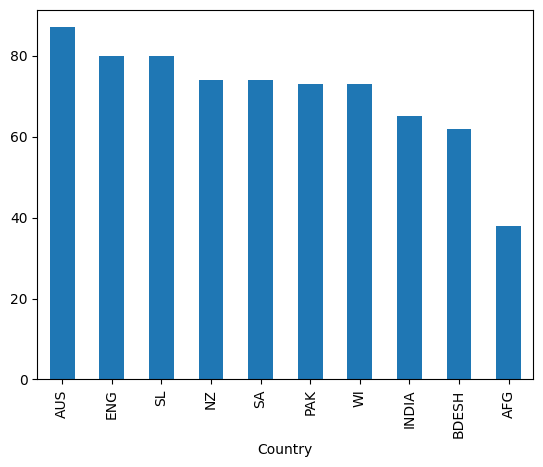

In [9]:
# Initial picture: 1
grouped_country_Players.plot(kind='bar')

<Axes: xlabel='Country'>

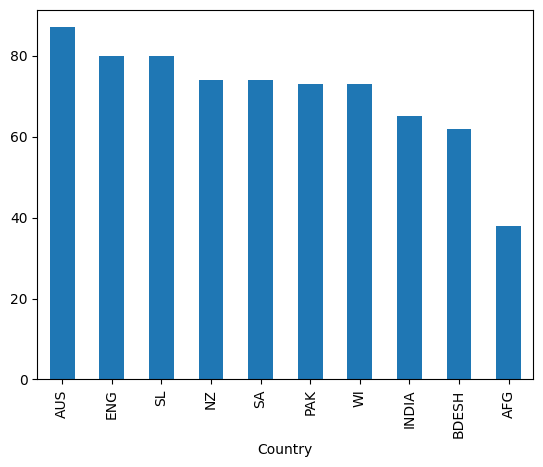

In [10]:
# Initial picture: 2
grouped_country_player_retcon.plot(kind='bar')

<Figure size 1000x600 with 0 Axes>

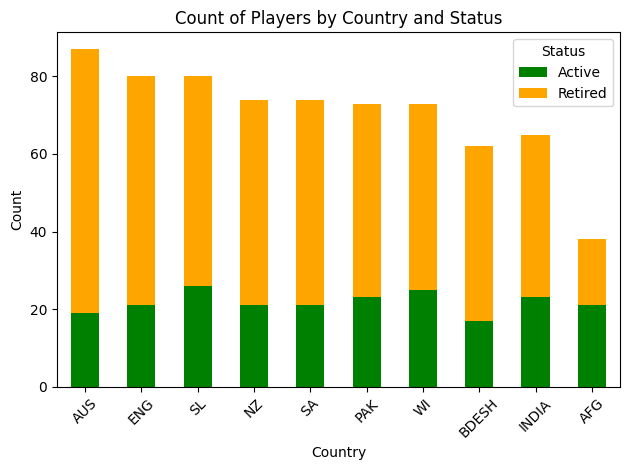

In [43]:
import matplotlib.pyplot as plt

count_players_status = dfx.groupby(['Country', 'Status'])['Players'].count().unstack(fill_value=0)

# Calculate the aggregate count of statuses (Active and Retired)
#count_players_status['Aggregate'] = count_players_status.sum(axis=1)
count_players_status = count_players_status.sort_values(by='Retired', ascending=False)

plt.figure(figsize=(10, 6))

# Bar chart for count of active and retired players for each country
count_players_status.plot(kind='bar', stacked=True, color=['green', 'orange'])

plt.title('Count of Players by Country and Status')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()


## Correlations Overview

<Figure size 2000x1600 with 0 Axes>

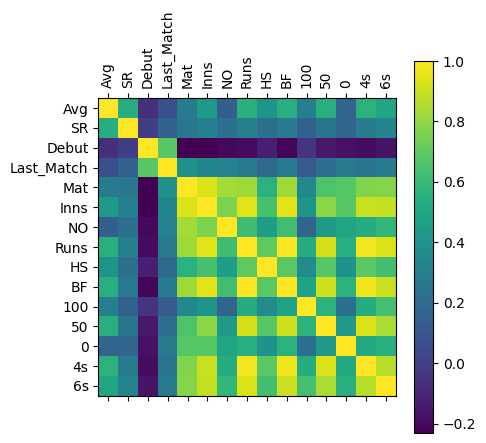

In [15]:
# Selecting relevant columns
dfxn = dfx[['Avg','SR','Debut','Last_Match','Mat','Inns','NO','Runs','HS','BF','100','50','0','4s','6s']]

# Creating the correlation matrix
corr_matrix = dfxn.corr()

# Plotting
plt.figure(figsize=(20, 16))
plt.matshow(corr_matrix, cmap='viridis')

# Setting xticks and yticks with column names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.colorbar()
plt.show()

In [24]:
Pak_stat = dfx.loc[(dfx['Country'] == 'PAK') & (dfx['Avg'] > 50), ['Players','Avg','SR', 'Mat', 'Inns', 'Runs', 'BF', 'NO', '100', '50']]
        

In [29]:
Pak_stat = dfx.loc[(dfx['Country'] == 'PAK'), ['Players','Avg','SR', 'Mat', 'Inns', 'Runs', 'BF', 'NO', '100', '50']]

In [30]:
Pak_stat=Pak_stat.sort_values(by='Avg', ascending=False)

In [45]:
Pak_stat['Avg'].mean
Pak_stat['SR'].mean

<bound method Series.mean of 107    127.50
446    143.28
287    120.06
181    107.99
447    144.23
        ...  
262     66.67
418      0.00
365      0.00
637      0.00
498      0.00
Name: SR, Length: 73, dtype: float64>

<Figure size 2000x1600 with 0 Axes>

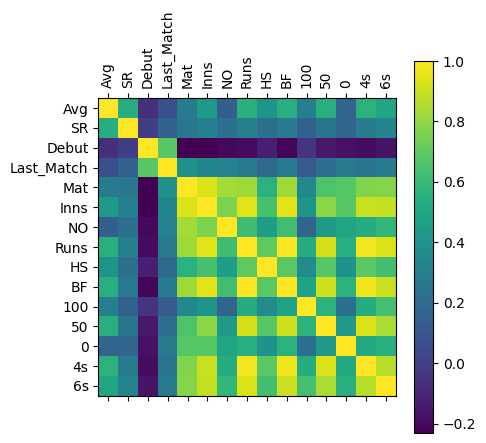

In [36]:
# Selecting relevant columns
pk_st = Pak_stat[['Avg','SR', 'Mat', 'Inns', 'Runs', 'BF', 'NO', '100', '50']]

# Creating the correlation matrix
corr_matrix = dfxn.corr()

# Plotting
plt.figure(figsize=(20, 16))
plt.matshow(corr_matrix, cmap='viridis')

# Setting xticks and yticks with column names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.colorbar()
plt.show()